In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
import scipy

(-10, 10)

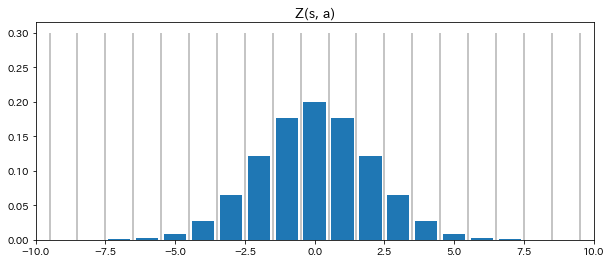

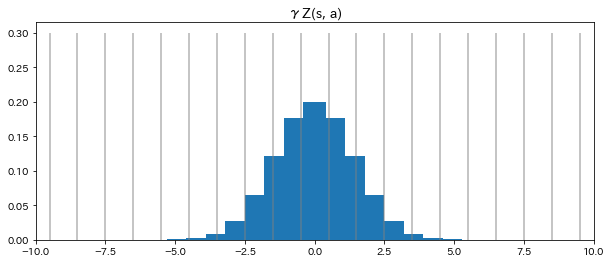

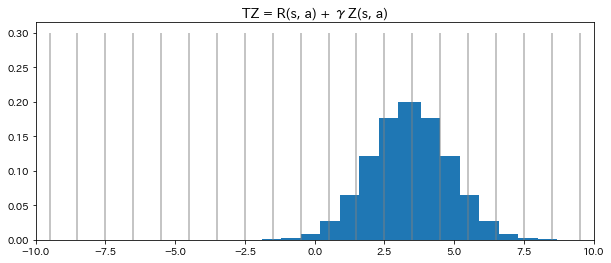

In [6]:

V_min = -10
V_max = 10
n_atoms = 21
gamma = 0.70 #わかりやすさのために割引率を小さく設定
reward = 3.4

normal_dist = scipy.stats.norm(0, 2)

Z = np.linspace(V_min, V_max, n_atoms)
delta_z = (V_max - V_min) / (n_atoms - 1)
probs = normal_dist.pdf(Z) / sum(normal_dist.pdf(Z))

gZ = gamma * Z
TZ = reward + gZ


plt.figure(figsize=(10, 4))
plt.vlines(np.arange(-10, 11, 1)-0.5, ymin=0, ymax=0.3, color="gray", alpha=0.6)
plt.bar(Z, probs)
plt.title("Z(s, a)", fontsize=14)
plt.xlim(-10,10)


plt.figure(figsize=(10, 4))
plt.vlines(np.arange(-10, 11, 1)-0.5, ymin=0, ymax=0.3, color="gray", alpha=0.6)

plt.bar(gZ, probs)
plt.title("γZ(s, a)", fontsize=14)
plt.xlim(-10,10)

plt.figure(figsize=(10, 4))
plt.vlines(np.arange(-10, 11, 1)-0.5, ymin=0, ymax=0.3, color="gray", alpha=0.6)
plt.bar(TZ, probs)
plt.title("TZ = R(s, a) + γZ(s, a)", fontsize=14)
plt.xlim(-10,10)


(-10, 10)

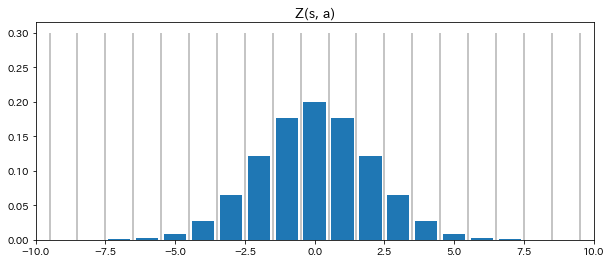

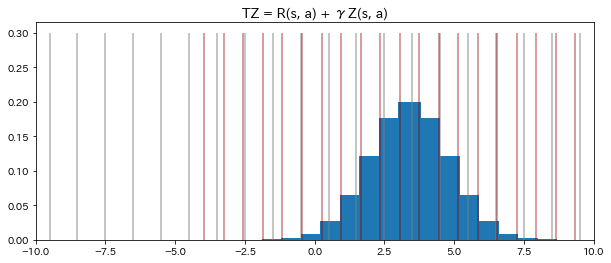

In [7]:

plt.figure(figsize=(10, 4))
plt.vlines(np.arange(-10, 11, 1)-0.5, ymin=0, ymax=0.3, color="gray", alpha=0.6)
plt.bar(Z, probs)
plt.title("Z(s, a)", fontsize=14)
plt.xlim(-10,10)

plt.figure(figsize=(10, 4))
plt.vlines(np.arange(-10, 11, 1)-0.5, ymin=0, ymax=0.3, color="gray", alpha=0.6)
plt.vlines(reward + gamma * (np.arange(-10, 11, 1)-0.5), ymin=0, ymax=0.3, color="darkred", alpha=0.5)
plt.bar(TZ, probs)
plt.title("TZ = R(s, a) + γZ(s, a)", fontsize=14)
plt.xlim(-10,10)


(-10, 10)

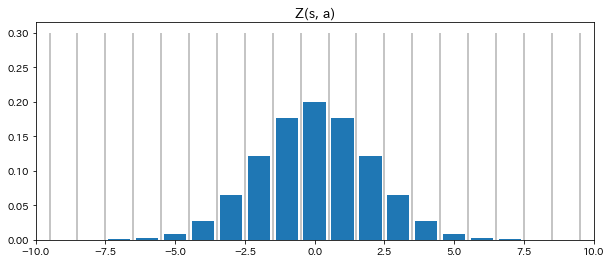

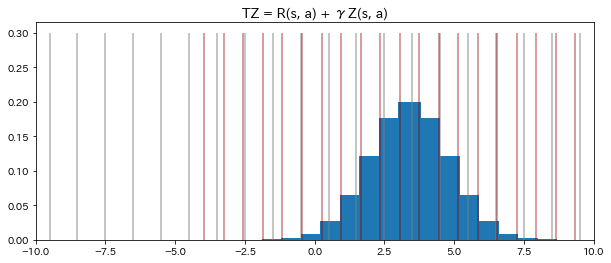

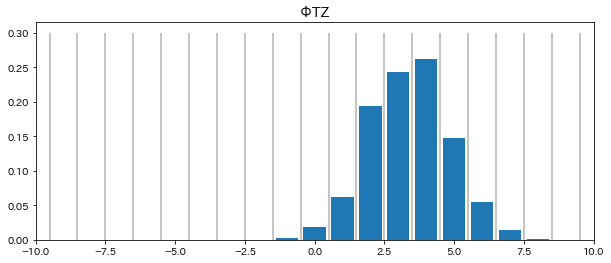

In [9]:
probs_proj = np.zeros(n_atoms)

for j in range(n_atoms):
    
    tZ_j = TZ[j]
    #: 設定区間を超えないようにTZをクリップ
    tZ_j = np.minimum(V_max, np.maximum(V_min, tZ_j))
    #: tZ_jが元のatomの何番目に当たるかを計算
    bj = (tZ_j - V_min) / delta_z

    lower_bj = np.floor(bj).astype(np.int64)
    upper_bj = np.ceil(bj).astype(np.int64)
    
    #:例 bjが 7.4なら atom_7に0.6, atom_8に0.4に重みづけ
    #:ただしbj=7.0のようにジャスト整数だったり、bj=11.2のように範囲からはみ出す場合は、
    #:lower_prob=upper_prob=1.0になってしまうので分岐で対処
    lower_prob = 1 - (bj - lower_bj)
    upper_prob = 1 - (upper_bj - bj)
    
    prob = probs[j]
    if lower_bj != upper_bj:
        probs_proj[lower_bj] += prob * lower_prob
        probs_proj[upper_bj] += prob * upper_prob
    else:
        probs_proj[lower_bj] += prob * 0.5
        probs_proj[upper_bj] += prob * 0.5


plt.figure(figsize=(10, 4))
plt.vlines(np.arange(-10, 11, 1)-0.5, ymin=0, ymax=0.3, color="gray", alpha=0.6)
plt.bar(Z, probs)
plt.title("Z(s, a)", fontsize=14)
plt.xlim(-10,10)

plt.figure(figsize=(10, 4))
plt.vlines(np.arange(-10, 11, 1)-0.5, ymin=0, ymax=0.3, color="gray", alpha=0.6)
plt.vlines(reward + gamma * (np.arange(-10, 11, 1)-0.5), ymin=0, ymax=0.3, color="darkred", alpha=0.5)
plt.bar(TZ, probs)
plt.title("TZ = R(s, a) + γZ(s, a)", fontsize=14)
plt.xlim(-10,10)

plt.figure(figsize=(10, 4))
plt.vlines(np.arange(-10, 11, 1)-0.5, ymin=0, ymax=0.3, color="gray", alpha=0.6)
plt.bar(Z, probs_proj)
plt.title("ΦTZ", fontsize=14)
plt.xlim(-10,10)
